Regresion Lineal logistica

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Lectura de datos
heart = pd.read_csv("framingham.csv")
heart.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
heart.head(3)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [26]:
heart[['age','currentSmoker','cigsPerDay','BMI','male']].head()

,age,currentSmoker,cigsPerDay,BMI,male
0,39,0,0.0,26.97,1
1,46,0,0.0,28.73,0
2,48,1,20.0,25.34,1
3,61,1,30.0,28.58,0
4,46,1,23.0,23.10,0


<Axes: xlabel='age', ylabel='male'>

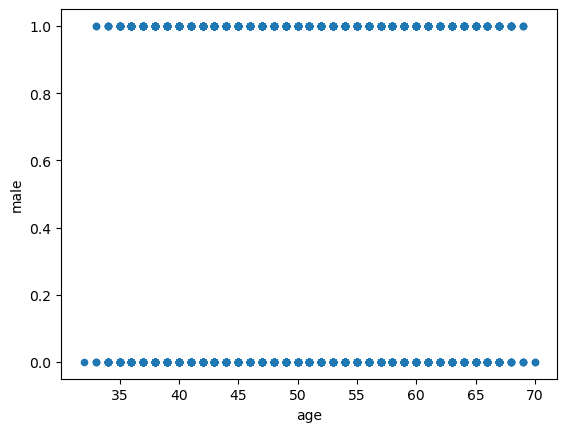

In [33]:
heart[['age','male']].plot.scatter(x='age',y='male')

In [72]:
from sklearn.linear_model import LogisticRegression

# definiendo input y output
X_heart = np.array(heart['age']).reshape((-1, 1))
Y_heart = np.array(heart['male'])

# creando modelo
model = LogisticRegression()
model.fit(X_heart, Y_heart)

# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

intercepto (b): [-0.00010812]
pendiente (w): [[-0.00578261]]


In [73]:
#Valores simplificados
w = -0.005
b = -0.0001

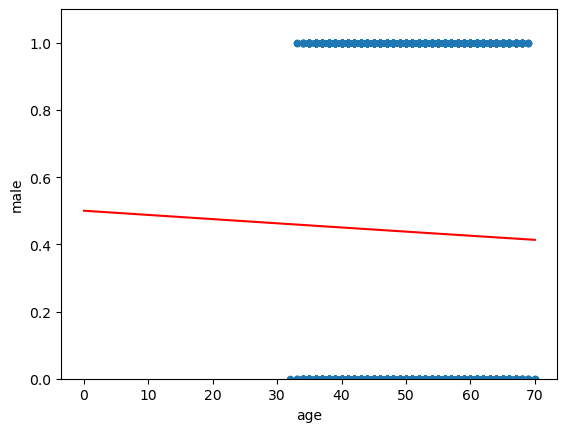

In [57]:
x = np.linspace(0,heart['age'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
heart.plot.scatter(x='age',y='male')
plt.plot(x, y, '-r')
plt.ylim(0,heart['male'].max()*1.1)
# plt.grid()
plt.show()

In [58]:
# calculo de las predicciones
heart['sigmoid'] = 1/(1+np.exp(-(heart['age']*w+b)))

# calculo de la funcion de error
heart['loss_xi'] = -heart['male']*np.log(heart['sigmoid'])-(1-heart['male'])*np.log(1-heart['sigmoid'])
cost_j = heart['loss_xi'].mean()
cost_j

0.6828711455706014

In [59]:
# hacemos dataframe para calcular el error en funcion de los parametros w, b
array = np.mgrid[0.05:0.15:0.01, -4:-3:0.01].reshape(2,-1).T
df = pd.DataFrame(data = array, 
                  columns = ['w','b'])

# round para solventar problema con muchos decimales
df['w'] = np.round(df['w'], 6)
df['b'] = np.round(df['b'], 6)

In [60]:
df

,w,b
0,0.05,-4.00
1,0.05,-3.99
2,0.05,-3.98
3,0.05,-3.97
4,0.05,-3.96
...,...,...
995,0.14,-3.05
996,0.14,-3.04
997,0.14,-3.03
998,0.14,-3.02


In [61]:
def sum_error_df(df):
    heart['sigmoid'] = 1/(1+np.exp(-(heart['age']*df['w']+df['b'])))
    heart['loss_xi'] = -heart['male']*np.log(heart['sigmoid'])-(1-heart['male'])*np.log(1-heart['sigmoid'])
    j_cost = heart['loss_xi'].mean()
    return(j_cost)

In [62]:
df['error'] = df.apply(sum_error_df, axis=1)

In [63]:
df.sort_values(by=['error']).head()

,w,b,error
99,0.05,-3.01,0.717854
98,0.05,-3.02,0.718404
97,0.05,-3.03,0.718976
96,0.05,-3.04,0.719571
95,0.05,-3.05,0.720188


In [64]:
df_3d = df.pivot(index='w', columns='b', values='error')

In [65]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

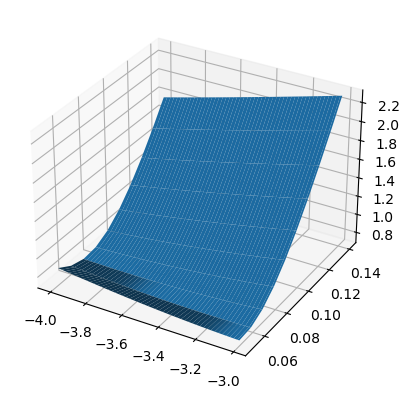

In [66]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

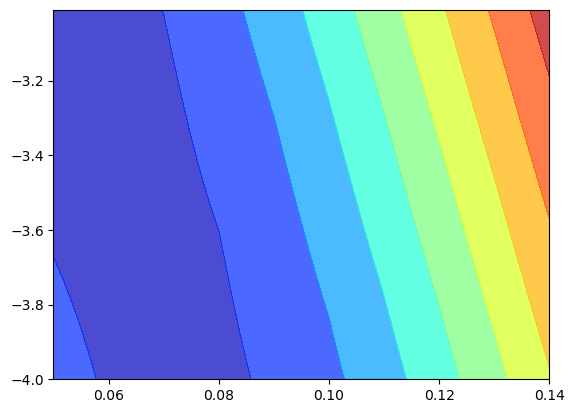

In [67]:
x = df_3d.columns
y = df_3d.index
X,Y = np.meshgrid(x,y)
Z = df_3d
plt.contourf(Y, X, Z, alpha=0.7, cmap=plt.cm.jet)

In [68]:
def delta_j_w(w, b):
    heart['sigmoid'] = 1/(1+np.exp(-(heart['age']*w+b)))
    heart['partial_loss'] = (heart['sigmoid']-heart['male'])*heart['age']
    derivative = heart['partial_loss'].mean()
    return(derivative) 

def delta_j_b(w, b):
    heart['sigmoid'] = 1/(1+np.exp(-(heart['age']*w+b)))
    heart['partial_loss'] = (heart['sigmoid']-heart['male'])
    derivative = heart['partial_loss'].mean()
    return(derivative) 

In [74]:
w_0 = -0.005 
b_0 = -0.0001

In [75]:
alpha_w = 0.001
alpha_b = 0.1

w_new = w_0 - alpha_w * delta_j_w(w_0, b_0)
b_new = b_0 - alpha_b * delta_j_b(w_0, b_0)

w_0 = w_new
b_0 = b_new

print(w_0, b_0)

-0.005485103362217032 -0.0010126076409527024
